In [1]:
import json
import time
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from textblob import TextBlob 

In [2]:
with open('/Users/kanhagannu/Desktop/Yuvi_RIP.json') as f:
    data = json.load(f)

In [3]:
len(data)

9189

In [4]:
y_tag = []
r_tag = []
yr_tag = []

In [5]:
for i in range(len(data)):
    if len(data[i]['entities']['hashtags'])==1:
        if data[i]['entities']['hashtags'][0]['text']=='MissYouYuvi':
            y_tag.append(data[i]['full_text'])

In [6]:
for i in range(len(data)):
    if len(data[i]['entities']['hashtags'])==1:
        if data[i]['entities']['hashtags'][0]['text']=='RestInPeace':
            r_tag.append(data[i]['full_text'])

In [7]:
for i in range(len(data)):
    if len(data[i]['entities']['hashtags'])==2:
        if (data[0]['entities']['hashtags'][0]['text']=='RestInPeace' or 'MissYouYuvi')and(data[1]['entities']['hashtags'][1]['text']=='RestInPeace' or 'MissYouYuvi'):
            yr_tag.append(data[i]['full_text'])

In [8]:
len(r_tag)

90

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(sentence): 
  
    sid_obj = SentimentIntensityAnalyzer() 

    sentiment_dict = sid_obj.polarity_scores(sentence) 
  
   
    '''analysis = TextBlob(sentence) 
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity==0:
        return 0
    else:
        return -1'''
  
    if sentiment_dict['compound'] >= 0.05 : 
        return 1 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return -1 
  
    else : 
        return 0
  
  


In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [11]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [12]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        st = sentiment_scores(tw)
        sents.append(st)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    print(len(sents))
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

In [13]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

4606


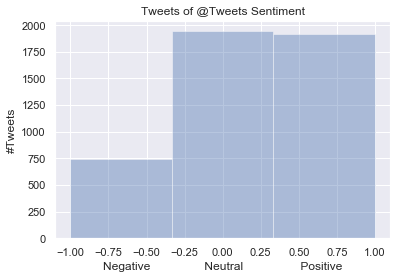

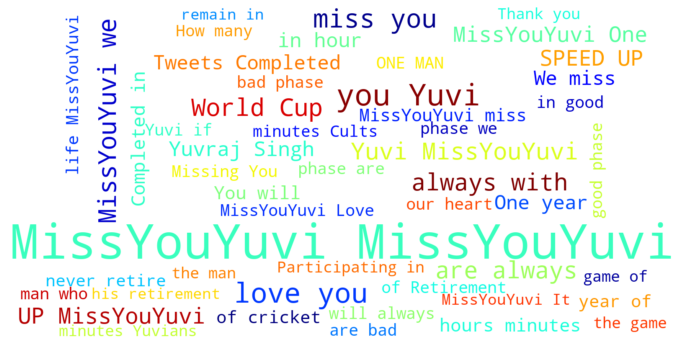

In [15]:
tweet = clean_tweets(y_tag)
tweet_an = anl_tweets(tweet)
word_cloud(tweet)

In [19]:
p_tweet = []
for tw in y_tag:
    if sentiment_scores(tw)==1:
        p_tweet.append(tw)
        

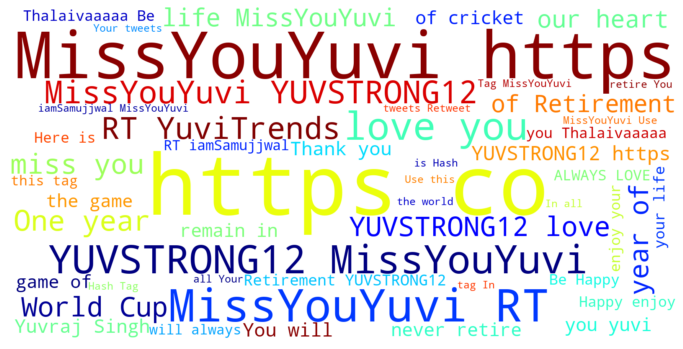

In [20]:
word_cloud(p_tweet)